In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\malaysia_house_rental_price_data.csv")

In [24]:
df.describe()

,completion_year,monthly_rent,rooms,parking,bathroom,size
count,10716.000000,1.987300e+04,19866.000000,14190.000000,19868.000000,1.987300e+04
mean,2014.788261,2.271422e+03,2.680358,1.416068,1.890829,5.952126e+03
std,6.747486,2.247811e+04,0.809031,0.567741,0.557113,7.093562e+05
min,1977.000000,7.000000e+01,1.000000,1.000000,1.000000,1.000000e+00
25%,2012.000000,1.100000e+03,2.000000,1.000000,2.000000,7.500000e+02
50%,2017.000000,1.400000e+03,3.000000,1.000000,2.000000,8.880000e+02
75%,2020.000000,1.800000e+03,3.000000,2.000000,2.000000,1.044000e+03
max,2025.000000,2.400000e+06,10.000000,10.000000,8.000000,1.000000e+08


In [25]:
df.select_dtypes('int')

""
0
1
2
3
4
...
19985
19986
19987
19988


In [26]:
df.isnull().sum()

prop_name                1063
completion_year          9274
monthly_rent              117
property_type             117
rooms                     124
parking                  5800
bathroom                  122
size                      117
furnished                 120
facilities               2323
additional_facilities    6046
city                      117
area                      117
dtype: int64

In [27]:
df.head()

,prop_name,completion_year,monthly_rent,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,city,area
0,The Hipster @ Taman Desa,2022.0,4200.0,Condominium,5.0,2.0,6.0,1842.0,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,Taman Desa
1,Segar Courts,NaN,2300.0,Condominium,3.0,1.0,2.0,1170.0,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur,Cheras
2,Pangsapuri Teratak Muhibbah 2,NaN,1000.0,Apartment,3.0,NaN,2.0,650.0,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur,Taman Desa
3,Sentul Point Suite Apartment,2020.0,1700.0,Apartment,2.0,1.0,2.0,743.0,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,Sentul
4,Arte Mont Kiara,NaN,1299.0,Service Residence,1.0,1.0,1.0,494.0,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur,Mont Kiara


In [28]:
df.tail()

,prop_name,completion_year,monthly_rent,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,city,area
19985,Pangsapuri Gapura Bayu,NaN,1200.0,Apartment,3.0,NaN,2.0,1000.0,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpos...",Near KTM/LRT,Selangor,Kajang
19986,BSP 21,2018.0,1300.0,Service Residence,4.0,2.0,3.0,1427.0,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...","Air-Cond, Cooking Allowed",Selangor,Bandar Saujana Putra
19987,Ameera Residence,NaN,1350.0,Condominium,3.0,2.0,2.0,1270.0,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor,Kajang
19988,The Arc @ Cyberjaya,NaN,1200.0,Service Residence,3.0,1.0,2.0,1100.0,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Washing Machine",Selangor,Cyberjaya
19989,Tamarind Suites @ Cyberjaya,2016.0,1000.0,Studio,1.0,1.0,1.0,580.0,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor,Cyberjaya


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19990 entries, 0 to 19989
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   prop_name              18927 non-null  object 
 1   completion_year        10716 non-null  float64
 2   monthly_rent           19873 non-null  float64
 3   property_type          19873 non-null  object 
 4   rooms                  19866 non-null  float64
 5   parking                14190 non-null  float64
 6   bathroom               19868 non-null  float64
 7   size                   19873 non-null  float64
 8   furnished              19870 non-null  object 
 9   facilities             17667 non-null  object 
 10  additional_facilities  13944 non-null  object 
 11  city                   19873 non-null  object 
 12  area                   19873 non-null  object 
dtypes: float64(6), object(7)
memory usage: 2.0+ MB


In [30]:
df.select_dtypes(include='number').agg({'min','max','mean','median','std','sum'})

,completion_year,monthly_rent,rooms,parking,bathroom,size
std,6.747486e+00,2.247811e+04,0.809031,0.567741,0.557113,7.093562e+05
max,2.025000e+03,2.400000e+06,10.000000,10.000000,8.000000,1.000000e+08
mean,2.014788e+03,2.271422e+03,2.680358,1.416068,1.890829,5.952126e+03
median,2.017000e+03,1.400000e+03,3.000000,1.000000,2.000000,8.880000e+02
min,1.977000e+03,7.000000e+01,1.000000,1.000000,1.000000,1.000000e+00
sum,2.159047e+07,4.513997e+07,53248.000000,20094.000000,37567.000000,1.182866e+08


In [31]:
#To clean the data:

In [32]:
df_clean = df.dropna(subset=['monthly_rent','completion_year'])

In [33]:
Q1 = df_clean['monthly_rent'].quantile(0.25)
Q3 = df_clean['monthly_rent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean['monthly_rent'] >= lower_bound) & (df_clean['monthly_rent'] <= upper_bound)]

# Remove outliers from completion_year
type_counts = df_clean["completion_year"].value_counts()
outlier_types = type_counts[type_counts == 1].index
df_clean = df_clean[~df_clean["completion_year"].isin(outlier_types)]

[]

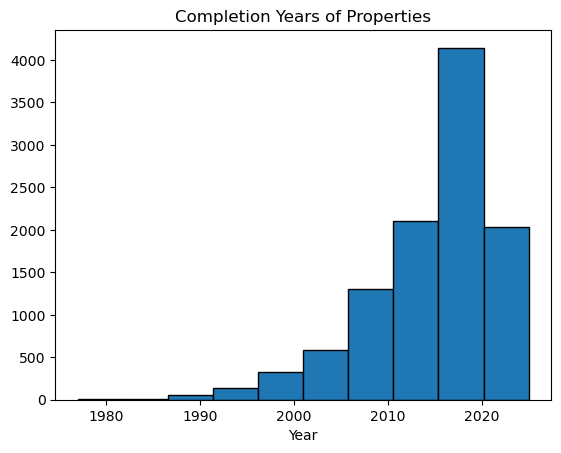

In [35]:
#Making a bar chart to see the number of properties built in various years
plt.hist(df.completion_year, ec='black') 
plt.title('Completion Years of Properties')
plt.xlabel('Year')
plt.plot()

In [36]:
completion_monthly = df.groupby(['completion_year'])[['monthly_rent']].mean() #Calculate the average rent for each year
completion_monthly = completion_monthly.nlargest(10,'monthly_rent') #Create a table of the top 10 years with the highest monthly rents
completion_monthly.index = completion_monthly.index.astype(int)
completion_monthly

,monthly_rent
completion_year,
2011,18254.256579
2003,5146.459459
2005,4851.439560
2008,4231.879630
2019,4183.864583
1984,3300.000000
2016,2729.997059
2015,2642.605459
2014,2335.300000


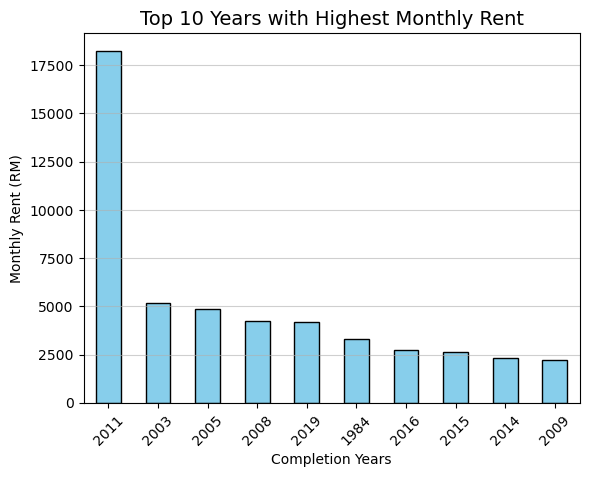

In [37]:
#Data visualisation of the top 10 highest monthly rents based on completion year
completion_monthly['monthly_rent'].plot(kind='bar', color='skyblue', ec='black')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.6)
plt.title('Top 10 Years with Highest Monthly Rent', fontsize=14)
plt.xlabel('Completion Years')
plt.ylabel('Monthly Rent (RM)')
plt.xticks(rotation=45)
plt.show()

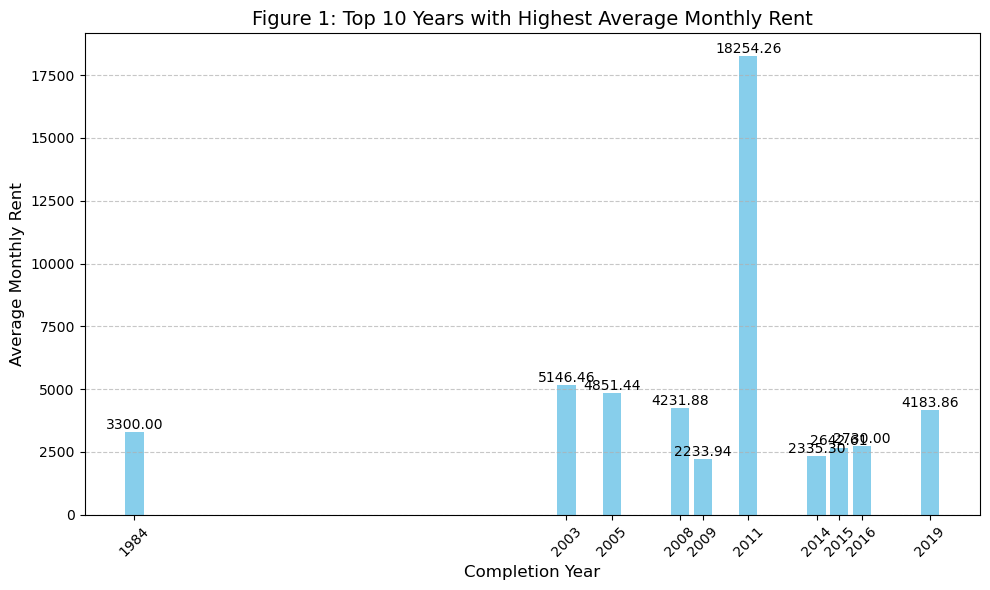

In [38]:
# This is an updated version of the previous bar chart above, modified by placing bars in chronological order and the exact values on the top of each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(completion_monthly.index, completion_monthly['monthly_rent'], color='skyblue')

# Add the values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Customize the plot
plt.title('Figure 1: Top 10 Years with Highest Average Monthly Rent', fontsize=14)
plt.xlabel('Completion Year', fontsize=12)
plt.ylabel('Average Monthly Rent', fontsize=12)
plt.xticks(completion_monthly.index, rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()